# 14.1. Properties of the Mean

In [23]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
not_symmetric = make_array(2, 3, 3, 9)

In [3]:
np.average(not_symmetric)

4.25

In [4]:
np.mean(not_symmetric)   ### can do weighted means; otherwise the same as average()

4.25

## 14.1.1. Basic Properties

- It need not be an element of the collection. (unlike media)
- It need not be an integer even if all the elements of the collection are integers.
- It is somewhere between the smallest and largest values in the collection.
- It need not be halfway between the two extremes; it is not in general true that half the elements in a collection are above the mean.
- If the collection consists of values of a variable measured in **specified units**, then the mean has the same units too.

## 14.1.2. The Mean is a “Smoother”

- mean is a better representation of the collection.

## 14.1.3. Proportions are Means

- If a collection consists only of ones and zeroes, then the sum of the collection is the number of ones in it, and the mean of the collection is the proportion of ones.
- Because proportions are a special case of means, results about random sample means apply to random sample proportions as well.

In [70]:
zero_one = make_array(1, 1, 1, 0)
zero_one

array([1, 1, 1, 0])

In [71]:
### built-in Python function
sum(zero_one)

3

In [72]:
### numpy function
np.sum(zero_one)

3

In [73]:
np.mean(zero_one)

0.75

In [74]:
### replace 1 by the Boolean True and 0 by False:
np.mean(make_array(True, True, True, False))

0.75

## 14.1.4. The Mean and the Histogram

- The mean of the collection {2, 3, 3, 9} is 4.25, which is not the “halfway point” of the data. So then what does the mean measure?

The mean of the collection {2, 3, 3, 9} is 4.25 

= (2 + 3 + 3 + 9) /4

= (2*1/4 + 3\*1/4 + 3\*1/4 + 9\*1/4

= 2\*1/4 + 3\***2**/4 + 9*1/4

- general fact: when we calculate the mean, each distinct value in the collection is weighted by the proportion of **times** it appears in the collection.

- This has an important consequence. The **mean** of a collection depends only on the **distinct values** and their **proportions**, not on the number of elements in the collection. In other words, the **mean** of a collection depends only on the **distribution of values** in the collection.

- Therefore, **if two collections have the same distribution, then they have the same mean**.

In [75]:
not_symmetric

array([2, 3, 3, 9])

In [76]:
np.mean(not_symmetric)

4.25

(0.0, 55.0)

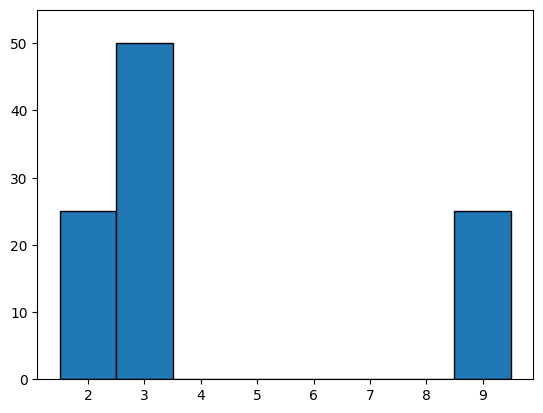

In [116]:
plt.hist(not_symmetric, bins = np.arange(1.5, 9.6, 1), weights=np.ones(len(not_symmetric)) / len(not_symmetric) * 100) 
# plt.hist(not_symmetric, bins = np.arange(.5, 9.6, 1))
# plt.ylim(0, 2.5)
plt.ylim(0, 55)

In [80]:
same_distribution = make_array(2, 2, 3, 3, 3, 3, 9, 9)
print(np.mean(same_distribution))
print(np.median(same_distribution))

4.25
3.0


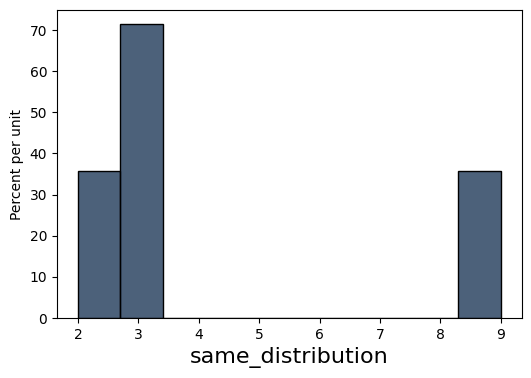

In [81]:
Table().with_column('same_distribution', same_distribution).hist()

The mean is a **physical attribute** of the **histogram of the distribution**. Here is the histogram of the distribution of not_symmetric or equivalently the distribution of same_distribution

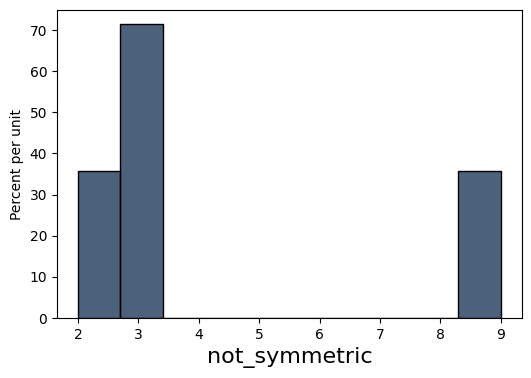

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.style.available
# plt.style('fivethirtyeight')


t1 = Table().with_column('not_symmetric', not_symmetric).hist()
t1

- Imagine the histogram as a figure made out of cardboard attached to a wire that runs along the horizontal axis, and
- imagine the bars as weights attached at the values 2, 3, and 9.
- Suppose you try to balance this figure on a point on the wire. If the point is near 2, the figure will tip over to the right. If the point is near 9, the figure will tip over to the left.
- Somewhere in between is the point where the figure will balance; that point is the 4.25, the mean.

**The mean is the center of gravity or balance point of the histogram.**

- To understand why that is, it helps to know some physics. The center of gravity is calculated exactly as we calculated the mean, by using the distinct values weighted by their proportions.

- Because the mean is a balance point, it is sometimes displayed as a fulcrum or triangle at the base of the histogram.

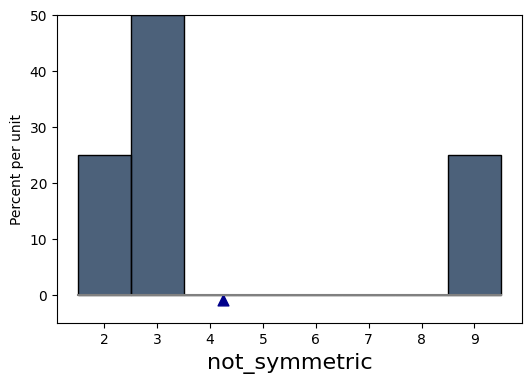

In [83]:
mean_ns = np.mean(not_symmetric)
t1 = Table().with_column(
    'not_symmetric', not_symmetric).hist(bins=np.arange(1.5, 9.6, 1))
# t1 = Table().with_column('not_symmetric', not_symmetric).hist()
plt.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plt.plot([1.5, 9.5], [0, 0], color='grey')
plt.ylim(-0.05, 0.5);

## 14.1.5. The Mean and the Median

- If a student’s score on a test is below average, does that imply that the student is in the bottom half of the class on that test?
- Happily for the student, the answer is, “Not necessarily.” The reason has to do with the relation between the average, which is the balance point of the histogram, and the median, which is the “half-way point” of the data.
- The relationship is easy to see in a simple example. Here is a histogram of the collection {2, 3, 3, 4} which is in the array symmetric. The distribution is symmetric about 3. The mean and the median are both equal to 3.



In [84]:
symmetric = make_array(2, 3, 3, 4)

mean_s is: 3.0
median_s is: 3.0


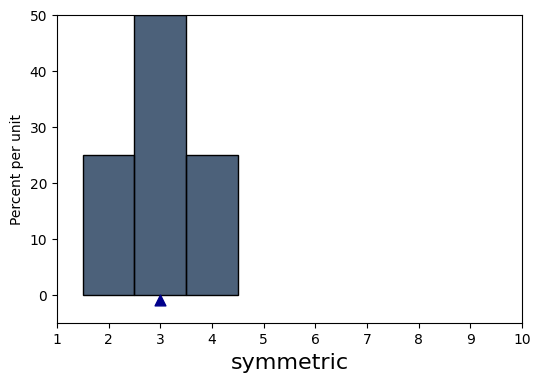

In [91]:
t2 = Table().with_columns('symmetric', symmetric)
mean_s = np.mean(symmetric)
median_s = np.median(symmetric)
t2.hist(bins=np.arange(1.5, 4.6, 1))
plt.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plt.xlim(1, 10)
plt.ylim(-0.05, 0.5);

print(f"mean_s is: {mean_s}")
print(f"median_s is: {median_s}")

In [94]:
np.mean(symmetric)

3.0

In [95]:
np.median(symmetric)

3.0

In [117]:
percentile(50, symmetric)

3

In general, **for symmetric distributions, the mean and the median are equal**.

- What if the distribution is not symmetric? Let’s compare symmetric and not_symmetric.



d1 mean:   3.0
d1 median: 3.0


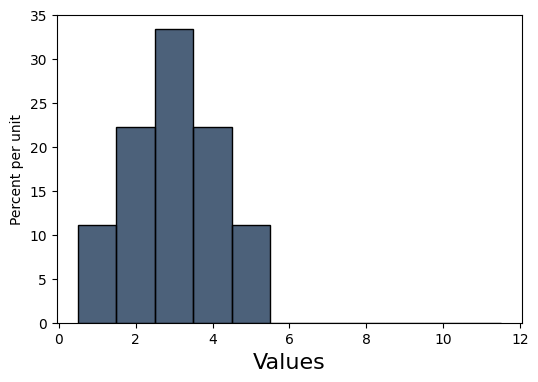

In [200]:
d1 = make_array(1, 2, 2, 3, 3, 3, 4, 4, 5)
t1 = Table().with_column('Values', d1)
t1.hist(bins=np.arange(0.5, 12, 1))
# plt.xlim(0.5, 12)

print(f"d1 mean:   {np.mean(t1.column('Values'))}")
print(f"d1 median: {np.median(t1.column('Values'))}")

d2 mean:   3.5555555555555554
d2 median: 3.0


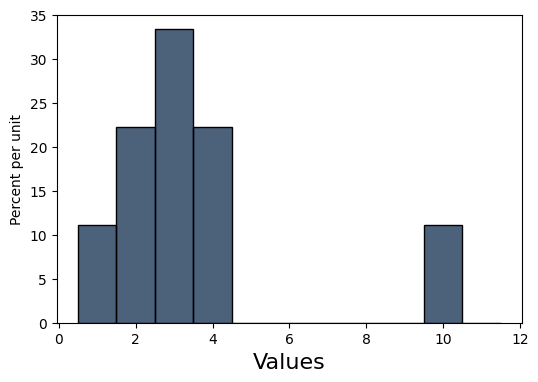

In [202]:
d2 = make_array(1, 2, 2, 3, 3, 3, 4, 4, 10)
t2 = Table().with_column('Values', d2)
t2.hist(bins=np.arange(0.5, 12, 1))
# plt.xlim(0.5, 12)
# print(f"t2 mean: {np.mean(t2.select('Values'))}")
print(f"d2 mean:   {np.mean(t2.column('Values'))}")
print(f"d2 median: {np.median(t2.column('Values'))}")

mean   of -2, -1, 0, 0, 3: 0.0
median of -2, -1, 0, 0, 3: 0.0


(0.0, 2.1)

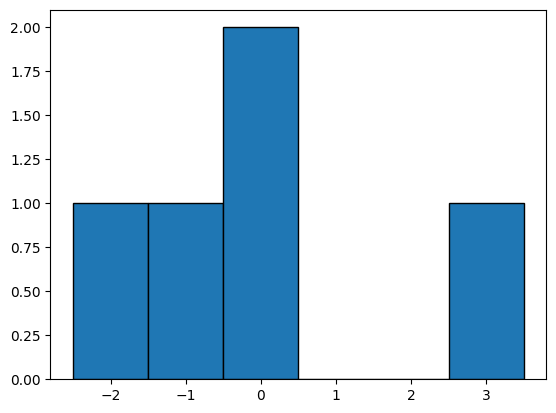

In [131]:
### on other hand
s = [ -2, -1, 0, 0, 3] 
print(f"mean   of -2, -1, 0, 0, 3: {np.mean(s)}")
print(f"median of -2, -1, 0, 0, 3: {np.median(s)}")
plt.hist(s, bins=np.arange(-2.5, 3.6, 1))
plt.ylim(0, 2.1)

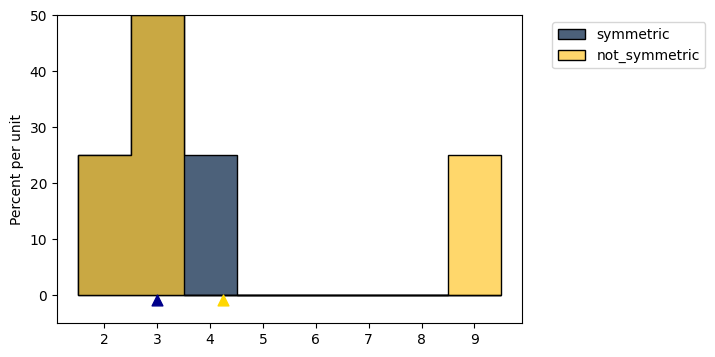

In [133]:
t3 = t2.with_column('not_symmetric', not_symmetric)
t3.hist(bins=np.arange(1.5, 9.6, 1))
plt.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plt.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plt.ylim(-0.05, 0.5);

In [ ]:
s=[1,2,]

- The blue histogram represents the original symmetric distribution.
- The gold histogram of not_symmetric starts out the same as the blue at the left end, but its rightmost bar has slid over to the value 9.
- The brown part is where the two histograms overlap.
  
- The **median and mean** of the blue distribution are both equal to 3.
- The **median of the gold distribution** is also equal to 3, though the right half is distributed differently from the left.
- But the mean of the gold distribution is not 3: the gold histogram would not balance at 3. The balance point has shifted to the right, to 4.25.
- In the gold distribution, 3 out of 4 entries (75%) are below average. The student with a below average score can therefore take heart. He or she might be in the majority of the class.
- In general, **if the histogram has a tail on one side (the formal term is “skewed”), then the mean is pulled away from the median in the direction of the tail**.



2.0


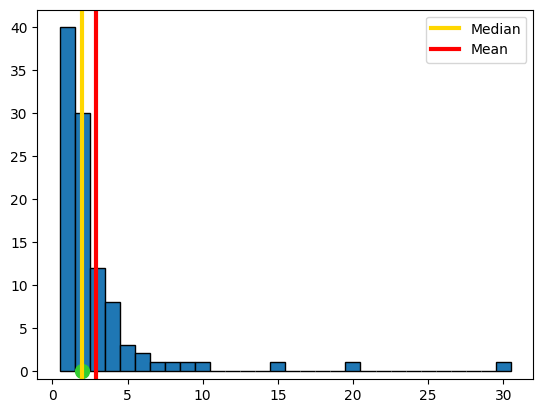

In [252]:
### discussion question
x = np.array([
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 
    1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  # peak at 1
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,          # still common
    3, 3, 3, 3, 3, 3,3, 3, 3, 3, 3, 3,                       # less common
    4, 4,4, 4,4, 4,4, 4,                          # tapering off
    5, 5, 5,                             # fewer
    6, 6,
    7, 8, 9, 10, 15,20, 30     # long tail
])
plt.hist(x, bins=np.arange(0.5, 31, 1))
plt.ylim(-1, 42)
parameter_green = '#32CD32'
plt.scatter(np.median(x), 0, color=parameter_green, s=100, zorder=2)
print(np.median(x))
plt.axvline(np.median(x), color='gold', linewidth=3, label='Median')
plt.axvline(np.mean(x), color='red', linewidth=3, label='Mean')
plt.legend()

In [250]:
sum(x > np.average(x)) / len(x) 

0.31372549019607843

## 14.1.5.1. Example

The table sf2015 contains salary and benefits data for San Francisco City employees in 2015. As before, we will restrict our analysis to those who had the equivalent of at least half-time employment for the year.



In [253]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
path_data = '../../data/'

In [254]:
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv')
sf2015.show(3)

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561


In [255]:
sf2015 = sf2015.where('Salaries', are.above(10000))

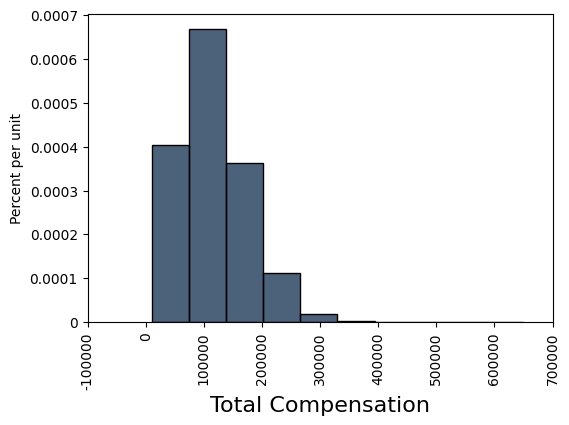

In [256]:
sf2015.select('Total Compensation').hist()

statistic,Total Compensation
min,11050.7
max,648875
median,110306
sum,4.19541e+09


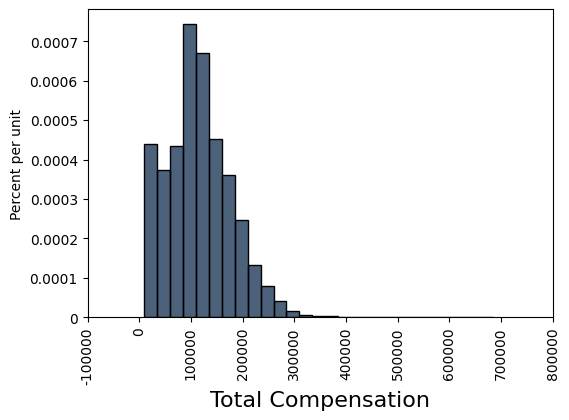

In [267]:
sf2015 = sf2015.where('Salaries', are.above(10000))
sf2015.select('Total Compensation').hist(bins = np.arange(10000, 700000, 25000))
sf2015.select('Total Compensation').stats()
### As we saw earlier, the highest compensation was above $600,000 
### but the vast majority of employees had compensations below $300,000.

- This histogram is skewed to the right; it has a right-hand tail.
- The mean gets pulled away from the median in the direction of the tail. So we expect the mean compensation to be larger than the median, and that is indeed the case

In [268]:
compensation = sf2015.column('Total Compensation')
np.median(compensation)

110305.78999999999

In [269]:
### mean will skew to the right of median
np.mean(compensation)

114725.98411824222

Distributions of incomes of large populations tend to be right skewed. When the bulk of a population has middle to low incomes, but a very small proportion has very high incomes, the histogram has a long, thin tail to the right.

- The **mean** income is **affected by this tail**: the farther the tail stretches to the right, the larger the mean becomes. But
- the **median** is **not affected** by values at the extremes of the distribution. That is why economists often summarize income distributions by the median instead of the mean.